In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Funcoes_auxiliares.func_aux import func_peso_calculado

# Knowing the dataset

In [2]:
#Import dataset
df = pd.read_csv('base_limpa/base_unificada_limpa.csv')

<ipython-input-2-94364e846f39>:2: DtypeWarning: Columns (25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base_limpa/base_unificada_limpa.csv')


In [3]:
pd.unique(df['FLAG_BASE'])

array(['SINASC', 'SIM_DOFET'], dtype=object)

In [4]:
df[df['FLAG_BASE'] == 'SIM_DOFET'].value_counts(['ano_evento'])

ano_evento
2019          27041
2021          26995
2020          26727
2022          24926
dtype: int64

In [5]:
# Configuration to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [6]:
url_dicionario = 'https://docs.google.com/spreadsheets/d/1QFy_F2o81ULglNx8knNqg6oI7v3RARaUAaLLwOQr7K4/edit?usp=sharing'
f"""The dataset has {len(df)} lines and {len(df.columns)} columns. More details can be consulted in the dictionary {url_dicionario}. Below the type of variables and the 'face' from the dataset"""

"The dataset has 10521394 lines and 47 columns. More details can be consulted in the dictionary https://docs.google.com/spreadsheets/d/1QFy_F2o81ULglNx8knNqg6oI7v3RARaUAaLLwOQr7K4/edit?usp=sharing. Below the type of variables and the 'face' from the dataset"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10521394 entries, 0 to 10521393
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   data_evento            object 
 1   ano_evento             int64  
 2   TIPOBITO               float64
 3   evento_MUNNOMEX        object 
 4   res_MUNNOMEX           object 
 5   evento_CAPITAL         object 
 6   res_CAPITAL            object 
 7   evento_REGIAO          object 
 8   res_REGIAO             object 
 9   evento_SIGLA_UF        object 
 10  res_SIGLA_UF           object 
 11  IDADEMAE               float64
 12  idademae_faixa         object 
 13  ESCMAE2010             float64
 14  escolaridade_mae       object 
 15  OBITOGRAV              float64
 16  GRAVIDEZ               float64
 17  tipo_gravidez          object 
 18  SEMAGESTAC             float64
 19  idade_gestacao_faixa   object 
 20  SEXO                   float64
 21  def_sexo               object 
 22  PESO            

In [8]:
df.head()

,data_evento,ano_evento,TIPOBITO,evento_MUNNOMEX,res_MUNNOMEX,evento_CAPITAL,res_CAPITAL,evento_REGIAO,res_REGIAO,evento_SIGLA_UF,res_SIGLA_UF,IDADEMAE,idademae_faixa,ESCMAE2010,escolaridade_mae,OBITOGRAV,GRAVIDEZ,tipo_gravidez,SEMAGESTAC,idade_gestacao_faixa,SEXO,def_sexo,PESO,peso_faixa,OBITOPARTO,def_obito_parto,CAUSABAS,causabas_capitulo,causabas_categoria,causabas_grupo,causabas_subcategoria,FLAG_BASE,sum_CENTROBS,sum_QTINST34,sum_QTINST35,sum_QTINST36,sum_QTINST37,sum_QTLEIT34,sum_QTLEIT38,sum_QTLEIT39,sum_QTLEIT40,sum_CENTRNEO,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_36,TP_UNID_61
0,2019-05-15,2019,NaN,ARIQUEMES,SENADOR GUIOMARD,N,N,Norte,Norte,RO,AC,31.0,entre_20_34,5.0,Ensino_superior,NaN,1.0,Unica,40.0,entre_40_42,1.0,Masculino,3420.0,entre_2500_3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINASC,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2019-04-26,2019,NaN,OURO PRETO DO OESTE,RIO BRANCO,N,S,Norte,Norte,RO,AC,34.0,entre_20_34,3.0,Ensino_medio,NaN,1.0,Unica,39.0,entre_37_39,2.0,Feminino,3115.0,entre_2500_3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINASC,2.0,1.0,7.0,1.0,3.0,4.0,0.0,5.0,42.0,2.0,4.0,4.0,0.0,43.0,0.0
2,2019-01-25,2019,NaN,PORTO VELHO,ACRELANDIA,S,N,Norte,Norte,RO,AC,35.0,entre_35_39,3.0,Ensino_medio,NaN,1.0,Unica,39.0,entre_37_39,2.0,Feminino,3605.0,entre_3500_3999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINASC,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2019-03-01,2019,NaN,PORTO VELHO,RIO BRANCO,S,S,Norte,Norte,RO,AC,26.0,entre_20_34,4.0,Ensino_superior,NaN,1.0,Unica,39.0,entre_37_39,2.0,Feminino,3430.0,entre_2500_3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINASC,2.0,1.0,7.0,1.0,3.0,4.0,0.0,5.0,42.0,2.0,4.0,4.0,0.0,43.0,0.0
4,2019-03-30,2019,NaN,PORTO VELHO,ACRELANDIA,S,N,Norte,Norte,RO,AC,23.0,entre_20_34,1.0,Fundamental,NaN,1.0,Unica,38.0,entre_37_39,1.0,Masculino,3170.0,entre_2500_3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINASC,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#  Checking data quality

### Duplicates

In [9]:
# Duplicate data 
duplicados = df.duplicated()
soma = duplicados.sum()
f"""The dataset has {soma} duplicate rows, which represents {round((soma/len(df)) * 100, 2)} %"""

'The dataset has 124 duplicate rows, which represents 0.0 %'

### Missing

In [10]:
# Counting missing values
df_sim_dofet = df[df['FLAG_BASE']=='SIM_DOFET']
missing_count_sim_dofet = df_sim_dofet.isnull().sum()  # counts the null values in each column
missing_percent_sim_dofet = round((missing_count_sim_dofet / len(df_sim_dofet)) * 100,2)  # calculates the percentage of null values
missing_data_sim_dofet = pd.DataFrame({'Missing Count': missing_count_sim_dofet, 'Missing Percentage': missing_percent_sim_dofet})
missing_data_sim_dofet.index.name = 'Variable'  # sets the index name to 'Variable'
missing_data_sim_dofet.reset_index(inplace=True)  # resets the index to make 'Variable' a column
missing_data_sim_dofet['BASE'] = 'SIM_DOFET'

df_sinasc = df[df['FLAG_BASE']=='SINASC']
missing_count_sinasc = df_sinasc.isnull().sum()  # counts the null values in each column
missing_percent_sinasc = round((missing_count_sinasc / len(df_sinasc)) * 100,2)  # calculates the percentage of null values
missing_data_sinasc = pd.DataFrame({'Missing Count': missing_count_sinasc, 'Missing Percentage': missing_percent_sinasc})
missing_data_sinasc.index.name = 'Variable'  # sets the index name to 'Variable'
missing_data_sinasc.reset_index(inplace=True)  # resets the index to make 'Variable' a column
missing_data_sinasc['BASE'] = 'SINASC'

# appending
missing_data = pd.concat([missing_data_sim_dofet, missing_data_sinasc])

# Sorting the DataFrame by the highest missing frequencies
missing_data_sorted = missing_data.sort_values(by=['BASE', 'Missing Count'], ascending=False)

missing_data_sorted[missing_data_sorted['Missing Percentage'] > 0]

# Some variables are not filled in the sinasc dataset. For EDA it will be used in SIM_DOFET, but in the model it will not be removed
# 'OBITOGRAV' no padding at the base
# Missing points for other variables will be removed, keeping the variables in the study

,Variable,Missing Count,Missing Percentage,BASE
2,TIPOBITO,10415705,100.00,SINASC
15,OBITOGRAV,10415705,100.00,SINASC
24,OBITOPARTO,10415705,100.00,SINASC
25,def_obito_parto,10415705,100.00,SINASC
26,CAUSABAS,10415705,100.00,SINASC
27,causabas_capitulo,10415705,100.00,SINASC
28,causabas_categoria,10415705,100.00,SINASC
29,causabas_grupo,10415705,100.00,SINASC
30,causabas_subcategoria,10415705,100.00,SINASC
15,OBITOGRAV,105681,99.99,SIM_DOFET


In [11]:
del missing_data_sorted, missing_data, df_sim_dofet, df_sinasc

### Categorical variables

In [12]:
lista_cat = [
'ano_evento'
, 'TIPOBITO'       
, 'evento_MUNNOMEX'
, 'res_MUNNOMEX'
, 'evento_CAPITAL'
, 'res_CAPITAL'
, 'evento_REGIAO'
, 'res_REGIAO'
, 'evento_SIGLA_UF'
, 'res_SIGLA_UF'
, 'idademae_faixa'
, 'ESCMAE2010'
, 'escolaridade_mae'
, 'OBITOGRAV'
, 'GRAVIDEZ'
, 'tipo_gravidez'
, 'idade_gestacao_faixa'
, 'SEXO'
, 'def_sexo'
, 'peso_faixa'
, 'OBITOPARTO'
, 'def_obito_parto'
, 'CAUSABAS'
, 'causabas_capitulo'
, 'causabas_categoria'
, 'causabas_grupo'
, 'causabas_subcategoria'
, 'FLAG_BASE'
            ]
for col in lista_cat:
    print(f'\nPercentual de valores únicos para {col}:')
    print(round((df[col].value_counts()/len(df)) * 100, 2))


Percentual de valores únicos para ano_evento:
2019    26.26
2020    25.22
2021    24.69
2022    23.83
Name: ano_evento, dtype: float64

Percentual de valores únicos para TIPOBITO:
1.0    1.0
Name: TIPOBITO, dtype: float64

Percentual de valores únicos para evento_MUNNOMEX:
SAO PAULO                           6.16
RIO DE JANEIRO                      2.80
BRASILIA                            1.96
RECIFE                              1.82
BELO HORIZONTE                      1.70
MANAUS                              1.49
FORTALEZA                           1.49
SALVADOR                            1.40
GOIANIA                             1.27
CURITIBA                            1.12
BELEM                               0.96
PORTO ALEGRE                        0.95
SAO LUIS                            0.81
MACEIO                              0.81
ARACAJU                             0.76
CAMPINAS                            0.72
TERESINA                            0.71
JOAO PESSOA                 

SAO PAULO                           5.49
RIO DE JANEIRO                      2.61
BRASILIA                            1.47
MANAUS                              1.39
FORTALEZA                           1.14
SALVADOR                            1.08
BELO HORIZONTE                      0.99
CURITIBA                            0.75
GOIANIA                             0.73
GUARULHOS                           0.72
RECIFE                              0.71
BELEM                               0.62
PORTO ALEGRE                        0.57
SAO LUIS                            0.55
MACEIO                              0.52
CAMPINAS                            0.51
CAMPO GRANDE                        0.50
TERESINA                            0.45
DUQUE DE CAXIAS                     0.44
JOAO PESSOA                         0.42
NOVA IGUACU                         0.40
NATAL                               0.39
CUIABA                              0.37
SAO GONCALO                         0.37
FEIRA DE SANTANA

Name: ESCMAE2010, dtype: float64

Percentual de valores únicos para escolaridade_mae:
Ensino_medio        53.35
Fundamental         23.98
Ensino_superior     22.30
Sem_escolaridade     0.37
Name: escolaridade_mae, dtype: float64

Percentual de valores únicos para OBITOGRAV:
1.0    0.0
2.0    0.0
9.0    0.0
Name: OBITOGRAV, dtype: float64

Percentual de valores únicos para GRAVIDEZ:
1.0    97.73
2.0     2.20
3.0     0.05
9.0     0.02
Name: GRAVIDEZ, dtype: float64

Percentual de valores únicos para tipo_gravidez:
Unica       97.73
Multipla     2.27
Name: tipo_gravidez, dtype: float64

Percentual de valores únicos para idade_gestacao_faixa:
entre_37_39    60.61
entre_40_42    27.16
entre_28_36    11.41
entre_22_27     0.78
Ignorado        0.04
Name: idade_gestacao_faixa, dtype: float64

Percentual de valores únicos para SEXO:
1.0    51.22
2.0    48.78
Name: SEXO, dtype: float64

Percentual de valores únicos para def_sexo:
Masculino    50.68
Feminino     49.32
Name: def_sexo, dtype: float

Fet rec-nasc afet fat mat e compl grav, trab parto    0.45
Outros transtornos originados no período perinatal    0.23
Transt respirat e cardiovasc específ per perinatal    0.19
Outras malformações congênitas                        0.03
Transt endócr e metaból trans espec fet e rec-nasc    0.02
Infecções de transmissão predominantemente sexual     0.02
Transt relac com a duração gestação e cresc fetal     0.01
Malformações congênitas do sistema nervoso            0.01
Anomalias cromossômicas NCOP                          0.01
Malformações congênitas do aparelho circulatório      0.01
Afecç comprom tegument e reg térm fet e recém-nasc    0.01
Transt hemorrág e hematológ feto e recém-nascido      0.00
Malform e deform congênit do sistema osteomuscular    0.00
Infecções específicas do período perinatal            0.00
Malformações congênitas do aparelho urinário          0.00
Malformações congênitas do aparelho respiratório      0.00
Outras malformações congênitas aparelho digestivo     0.

SINASC       99.0
SIM_DOFET     1.0
Name: FLAG_BASE, dtype: float64


### Numerical variables

In [13]:
# Basic Statistics for Numeric Variables
lista_numerica = [
'IDADEMAE'
, 'SEMAGESTAC'
, 'PESO'
, 'sum_CENTROBS'
, 'sum_QTINST34'
, 'sum_QTINST35'
, 'sum_QTINST36'
, 'sum_QTINST37'
, 'sum_QTLEIT34'
, 'sum_QTLEIT38'
, 'sum_QTLEIT39'
, 'sum_QTLEIT40'
, 'sum_CENTRNEO'
, 'TP_UNID_5'
, 'TP_UNID_7'
, 'TP_UNID_15'
, 'TP_UNID_36'
, 'TP_UNID_61'
]
estatisticas_numericas = df[lista_numerica].describe()
estatisticas_numericas

,IDADEMAE,SEMAGESTAC,PESO,sum_CENTROBS,sum_QTINST34,sum_QTINST35,sum_QTINST36,sum_QTINST37,sum_QTLEIT34,sum_QTLEIT38,sum_QTLEIT39,sum_QTLEIT40,sum_CENTRNEO,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_36,TP_UNID_61
count,1.052139e+07,1.052139e+07,1.052139e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07,1.052081e+07
mean,2.732491e+01,3.832743e+01,3.163136e+03,8.728241e+00,1.263002e+01,1.514796e+01,2.665669e+00,1.314823e+01,2.906890e+01,3.110738e+01,4.442262e+01,1.263125e+02,6.194270e+00,1.789983e+01,8.324746e+00,3.274653e-01,3.683938e+02,1.765912e-01
std,6.758595e+00,2.446665e+00,5.854124e+02,1.763621e+01,2.853485e+01,3.355129e+01,4.287505e+00,2.884169e+01,6.199336e+01,7.859974e+01,1.123159e+02,2.803691e+02,1.323287e+01,3.822803e+01,1.695424e+01,9.448199e-01,8.401360e+02,5.308135e-01
min,1.000000e+01,2.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,3.800000e+01,2.888000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,2.700000e+01,3.900000e+01,3.210000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01,0.000000e+00
75%,3.200000e+01,4.000000e+01,3.520000e+03,6.000000e+00,8.000000e+00,9.000000e+00,3.000000e+00,9.000000e+00,1.900000e+01,1.400000e+01,1.700000e+01,8.100000e+01,4.000000e+00,1.200000e+01,5.000000e+00,0.000000e+00,1.910000e+02,0.000000e+00
max,5.000000e+01,9.900000e+01,6.700000e+03,8.100000e+01,1.300000e+02,1.620000e+02,2.100000e+01,1.390000e+02,2.850000e+02,3.740000e+02,4.920000e+02,1.312000e+03,5.800000e+01,1.610000e+02,7.100000e+01,9.000000e+00,4.586000e+03,2.000000e+00


### Outlier

In [14]:
def detectar_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

outliers_numericos = df[lista_numerica].apply(detectar_outliers)

for i in lista_numerica:
    print(outliers_numericos.loc[~outliers_numericos[i].isna(), [i]].describe())

          IDADEMAE
count  2416.000000
mean     48.692881
std       0.775963
min      48.000000
25%      48.000000
50%      48.000000
75%      49.000000
max      50.000000
          SEMAGESTAC
count  553387.000000
mean       31.554405
std         5.385308
min        22.000000
25%        30.000000
50%        32.000000
75%        34.000000
max        99.000000
                PESO
count  423899.000000
mean     1858.222188
std      1317.931709
min         1.000000
25%      1045.000000
50%      1550.000000
75%      1860.000000
max      6700.000000
       sum_CENTROBS
count  1.720123e+06
mean   4.037160e+01
std    2.586171e+01
min    1.400000e+01
25%    1.900000e+01
50%    2.700000e+01
75%    7.300000e+01
max    8.100000e+01
       sum_QTINST34
count  1.660748e+06
mean   6.379691e+01
std    4.443979e+01
min    1.900000e+01
25%    2.500000e+01
50%    4.000000e+01
75%    1.220000e+02
max    1.300000e+02
       sum_QTINST35
count  1.669990e+06
mean   7.709345e+01
std    4.933971e+01
min    2.20

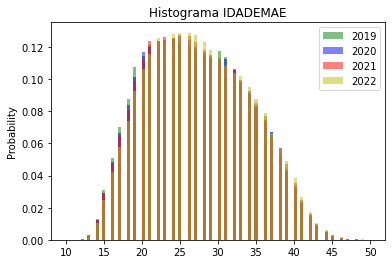

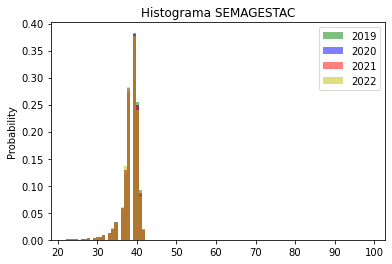

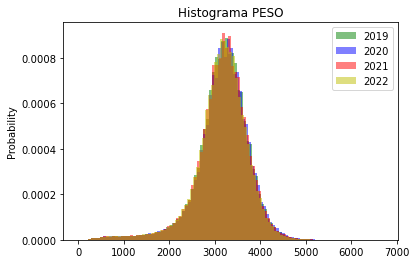

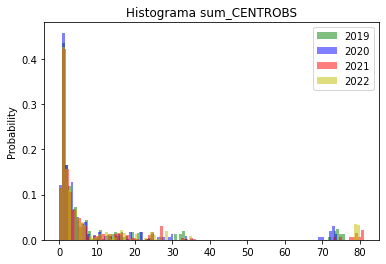

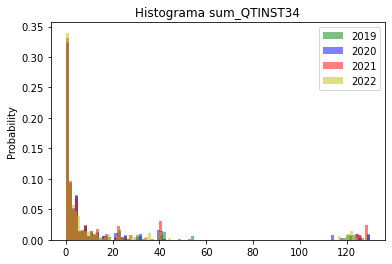

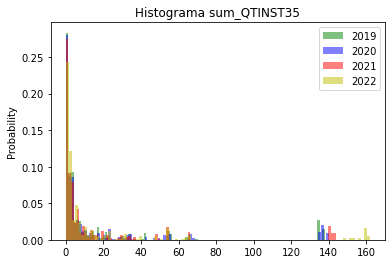

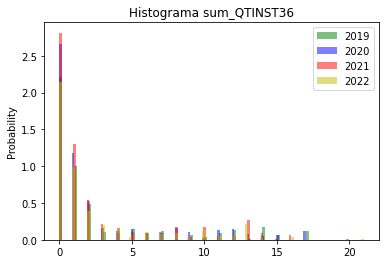

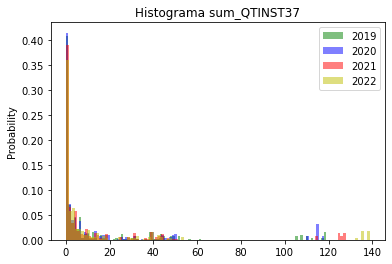

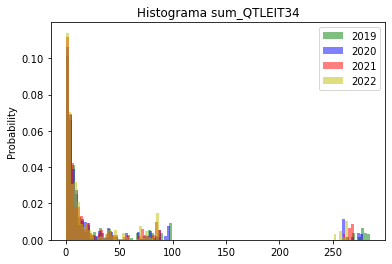

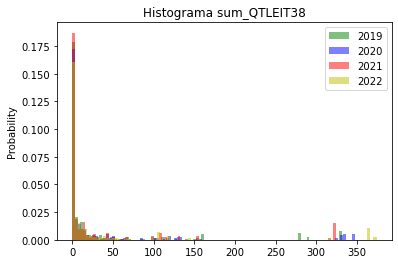

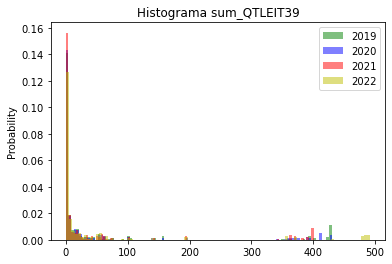

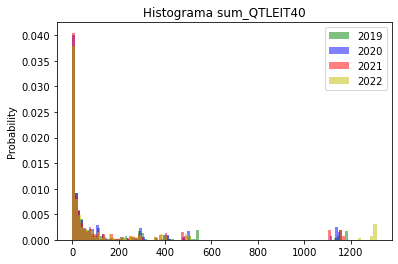

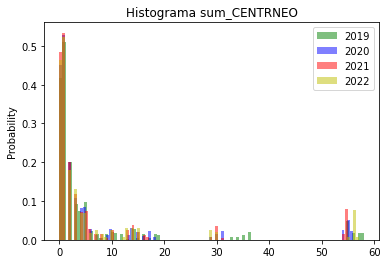

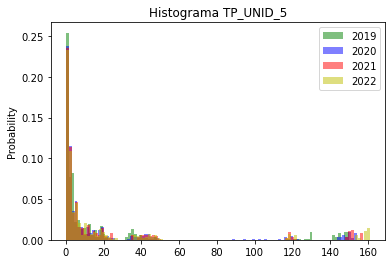

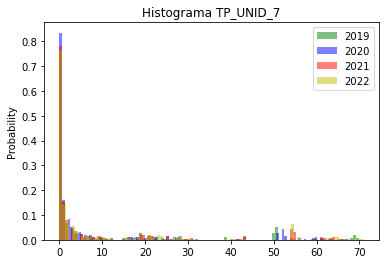

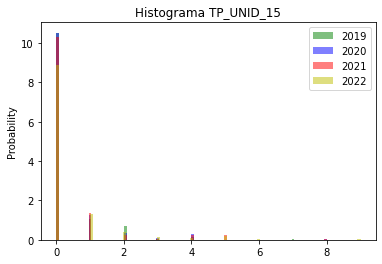

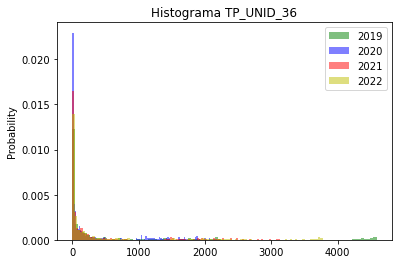

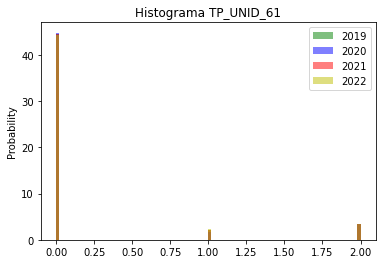

In [15]:
for i in lista_numerica:
    x1 = df.loc[df['ano_evento'] == 2019, i]
    x2 = df.loc[df['ano_evento'] == 2020, i]
    x3 = df.loc[df['ano_evento'] == 2021, i]
    x4 = df.loc[df['ano_evento'] == 2022, i]

    # Normalize
    kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

    # Plot
    plt.figure()  # Creates a new figure for each iteration
    plt.hist(x1, **kwargs, color='g', label='2019')
    plt.hist(x2, **kwargs, color='b', label='2020')
    plt.hist(x3, **kwargs, color='r', label='2021')
    plt.hist(x4, **kwargs, color='y', label='2022')
    plt.gca().set(title=f'Histograma {i}', ylabel='Probability')
    # plt.xlim(50, 75)
    plt.legend()

    # Show or save the figure here if needed
    # plt.savefig(f'histograma_{i}.png')

    plt.show()  # Show the graph

# Some questions

#### What is the percentage of deaths from each type of cause each year?

In [16]:
df_sim_dofet = df.loc[df['FLAG_BASE']=='SIM_DOFET']
contingency_table = pd.crosstab(index=df_sim_dofet['causabas_categoria'], columns=df_sim_dofet['ano_evento'], normalize='columns')
contingency_table = contingency_table.reset_index()
contingency_table.sort_values(by=2019, ascending=False)

ano_evento,causabas_categoria,2019,2020,2021,2022
14,P20 Hipoxia intra-uterina,0.221478,0.182662,0.178589,0.179818
34,P95 Morte fetal de causa NE,0.208831,0.226138,0.227487,0.211300
3,P02 Fet rec-nasc afet compl plac cord umb membr,0.188972,0.191716,0.179737,0.183552
1,P00 Fet rec-nasc afet afec mat n obr rel gra...,0.173884,0.186478,0.197963,0.200899
2,P01 Fet rec-nasc afet complic maternas gravidez,0.050812,0.047630,0.050898,0.056861
90,Q89 Outr malformacoes congen NCOP,0.024777,0.024769,0.025820,0.026262
29,P70 Trans transit metab carboid esp fet rec-...,0.020968,0.023198,0.023930,0.024254
0,A50 Sifilis congen,0.015791,0.015228,0.015521,0.015821
4,P03 Fet rec-nasc afet out compl trab parto p...,0.013794,0.014367,0.014892,0.014175
35,P96 Outr afeccoes originadas periodo perinatal,0.011908,0.011935,0.009446,0.009156


#### What is the proportion of deaths and births for each UF where the event (death or birth) occurred?

In [17]:
df_agrupado = df.groupby(
 [
    'evento_SIGLA_UF'
    , 'FLAG_BASE'
    , 'ano_evento'
 ]
    , as_index=False
).agg(
    count_evento=pd.NamedAgg(column='evento_SIGLA_UF', aggfunc='size')
)

df_pivot = pd.pivot_table(
    df_agrupado
    , index=['evento_SIGLA_UF']
    , columns=['FLAG_BASE', 'ano_evento']
).reset_index()
df_pivot.columns = ['SIGLA_UF', 'SIM_DOFET_2019', 'SIM_DOFET_2020', 'SIM_DOFET_2021', 'SIM_DOFET_2022', 'SINASC_2019'
                    , 'SINASC_2020', 'SINASC_2021', 'SINASC_2022']

df_pivot['PROP_2019'] = df_pivot['SIM_DOFET_2019']/df_pivot['SINASC_2019']
df_pivot['PROP_2020'] = df_pivot['SIM_DOFET_2020']/df_pivot['SINASC_2020']
df_pivot['PROP_2021'] = df_pivot['SIM_DOFET_2021']/df_pivot['SINASC_2021']
df_pivot['PROP_2022'] = df_pivot['SIM_DOFET_2022']/df_pivot['SINASC_2022']
df_pivot

,SIGLA_UF,SIM_DOFET_2019,SIM_DOFET_2020,SIM_DOFET_2021,SIM_DOFET_2022,SINASC_2019,SINASC_2020,SINASC_2021,SINASC_2022,PROP_2019,PROP_2020,PROP_2021,PROP_2022
0,AC,186,192,170,144,15844,14918,15609,14438,0.011739,0.012870,0.010891,0.009974
1,AL,525,543,518,480,41641,46476,47588,45118,0.012608,0.011683,0.010885,0.010639
2,AM,852,853,943,794,75612,73307,75937,70627,0.011268,0.011636,0.012418,0.011242
3,AP,198,219,214,159,15571,15371,15953,14829,0.012716,0.014248,0.013414,0.010722
4,BA,2378,2429,2479,2201,176382,169688,163668,157948,0.013482,0.014315,0.015147,0.013935
5,CE,1292,1287,1282,1107,114732,110094,107347,102854,0.011261,0.011690,0.011943,0.010763
6,DF,477,520,514,514,54103,51641,50253,48120,0.008817,0.010070,0.010228,0.010682
7,ES,475,489,504,463,54166,53049,51823,51015,0.008769,0.009218,0.009725,0.009076
8,GO,664,694,716,716,82586,78964,77699,76779,0.008040,0.008789,0.009215,0.009325
9,MA,1322,1240,1323,1190,103971,91028,92556,89461,0.012715,0.013622,0.014294,0.013302


#### Has any municipality seen a decrease in the number of beds and rooms dedicated to childbirth care?

In [18]:
df_agrupado = df.groupby(
 [
    'evento_SIGLA_UF'
    , 'evento_MUNNOMEX'
    , 'ano_evento'
 ]
    , as_index=False
).agg(
    QTINST34=pd.NamedAgg(column='sum_QTINST34', aggfunc='max')
    , QTINST35=pd.NamedAgg(column='sum_QTINST35', aggfunc='max')
    , QTINST36=pd.NamedAgg(column='sum_QTINST36', aggfunc='max')
    , QTINST37=pd.NamedAgg(column='sum_QTINST37', aggfunc='max')
    , QTLEIT34=pd.NamedAgg(column='sum_QTLEIT34', aggfunc='max')
    , QTLEIT38=pd.NamedAgg(column='sum_QTLEIT38', aggfunc='max')
    , QTLEIT39=pd.NamedAgg(column='sum_QTLEIT39', aggfunc='max')
    , QTLEIT40=pd.NamedAgg(column='sum_QTLEIT40', aggfunc='max')
    )

df_agrupado['QTINST'] = df_agrupado['QTINST34'] + df_agrupado['QTINST35'] + df_agrupado['QTINST36'] + df_agrupado['QTINST37']
df_agrupado['QTLEIT'] = df_agrupado['QTLEIT34'] + df_agrupado['QTLEIT38'] + df_agrupado['QTLEIT39'] + df_agrupado['QTLEIT40']

df_pivot = pd.pivot_table(
    df_agrupado
    , index=['evento_SIGLA_UF', 'evento_MUNNOMEX']
    , columns=['ano_evento']
    , values = ['QTINST', 'QTLEIT']
    , fill_value=0
).reset_index()
df_pivot.columns = ['evento_SIGLA_UF', 'evento_MUNNOMEX', 'QTINST_2019', 'QTINST_2020', 'QTINST_2021', 'QTINST_2022',
                   'QTLEIT_2019', 'QTLEIT_2020', 'QTLEIT_2021', 'QTLEIT_2022']

df_pivot['dif_qtinst_20_19'] = df_pivot['QTINST_2020'] - df_pivot['QTINST_2019'] 
df_pivot['dif_qtinst_21_20'] = df_pivot['QTINST_2021'] - df_pivot['QTINST_2020'] 
df_pivot['dif_qtinst_22_21'] = df_pivot['QTINST_2022'] - df_pivot['QTINST_2021'] 
df_pivot['dif_qtleit_20_19'] = df_pivot['QTLEIT_2020'] - df_pivot['QTLEIT_2019'] 
df_pivot['dif_qtleit_21_20'] = df_pivot['QTLEIT_2021'] - df_pivot['QTLEIT_2020'] 
df_pivot['dif_qtleit_22_21'] = df_pivot['QTLEIT_2022'] - df_pivot['QTLEIT_2021'] 

In [19]:
aa = df_pivot.loc[(df_pivot['dif_qtinst_20_19']<0) | (df_pivot['dif_qtinst_21_20']<0) | (df_pivot['dif_qtinst_22_21']<0) |
            (df_pivot['dif_qtleit_20_19']<0) | (df_pivot['dif_qtleit_21_20']<0) | (df_pivot['dif_qtleit_22_21']<0)]
aa
# ~67% of the municipalities had some change in the years of the study

,evento_SIGLA_UF,evento_MUNNOMEX,QTINST_2019,QTINST_2020,QTINST_2021,QTINST_2022,QTLEIT_2019,QTLEIT_2020,QTLEIT_2021,QTLEIT_2022,dif_qtinst_20_19,dif_qtinst_21_20,dif_qtinst_22_21,dif_qtleit_20_19,dif_qtleit_21_20,dif_qtleit_22_21
0,AC,ACRELANDIA,30,2,23,6,196,1,197,25,-28,21,-17,-195,196,-172
1,AC,ASSIS BRASIL,2,2,17,2,0,0,53,0,0,15,-15,0,53,-53
2,AC,BRASILEIA,17,17,9,13,53,66,8,26,0,-8,4,13,-58,18
3,AC,BUJARI,0,4,0,0,0,7,0,0,4,-4,0,7,-7,0
5,AC,CRUZEIRO DO SUL,70,75,29,23,464,508,197,67,5,-46,-6,44,-311,-130
7,AC,FEIJO,19,19,8,8,65,65,36,19,0,-11,0,0,-29,-17
8,AC,JORDAO,2,1,1,2,20,0,0,20,-1,0,1,-20,0,20
9,AC,MANCIO LIMA,14,11,10,14,39,24,26,43,-3,-1,4,-15,2,17
10,AC,MANOEL URBANO,16,4,8,1,53,7,22,3,-12,4,-7,-46,15,-19
12,AC,PLACIDO DE CASTRO,17,27,23,23,53,197,197,197,10,-4,0,144,0,0


#### How many municipalities had less than 500 births in a year?

In [20]:
df_sinasc = df.loc[df['FLAG_BASE']=='SINASC']
df_agrupado = df_sinasc.groupby(
 [
    'evento_SIGLA_UF'
    ,'evento_MUNNOMEX'
    , 'ano_evento'
 ]
    , as_index=False
).agg(
    count_evento=pd.NamedAgg(column='evento_SIGLA_UF', aggfunc='size')
)

df_pivot = pd.pivot_table(
    df_agrupado
    , index=['evento_SIGLA_UF', 'evento_MUNNOMEX']
    , columns=['ano_evento']
    , fill_value=0
).reset_index()

df_pivot.columns = ['evento_SIGLA_UF', 'evento_MUNNOMEX', 'nasc_2019', 'nasc_2020', 'nasc_2021', 'nasc_2022']

aa = df_pivot.loc[(df_pivot['nasc_2019'] > 0)  & (df_pivot['nasc_2019'] <= 500)]
bb = df_pivot.loc[(df_pivot['nasc_2020'] > 0)  & (df_pivot['nasc_2020'] <= 500)]
cc = df_pivot.loc[(df_pivot['nasc_2021'] > 0)  & (df_pivot['nasc_2021'] <= 500)]
dd = df_pivot.loc[(df_pivot['nasc_2022'] > 0)  & (df_pivot['nasc_2022'] <= 500)]

print(f"""In 2019 {len(aa)} municipalities had less than 500 births""")
print(f"""In 2020 {len(bb)} municipalities had less than 500 births""")
print(f"""In 2021 {len(cc)} municipalities had less than 500 births""")
print(f"""In 2022 {len(dd)} municipalities had less than 500 births""")


# df_pivot.loc[(df_pivot['nasc_2019'] <= 500) | (df_pivot['nasc_2020'] <= 500) | (df_pivot['nasc_2021'] <= 500) |
#             (df_pivot['nasc_2022'] <= 500)]

In 2019 2876 municipalities had less than 500 births
In 2020 2866 municipalities had less than 500 births
In 2021 2962 municipalities had less than 500 births
In 2022 2960 municipalities had less than 500 births
